In [436]:
# Import all necessary packages.

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn import linear_model, preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

from sb_utils import save_file

In [162]:
# Import and display the preprocessed housing prices data, as well as the train and test splits.
# Raw original data source: https://www.kaggle.com/datasets/fedesoriano/california-housing-prices-data-extra-features

house_data = pd.read_csv('house_data_preprocessed.csv')
house_data

,Median_House_Value,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
0,452600.0,83252.0,41.000000,880,129,322,126,37.88,-122.23,5.76,345.81,457.02,41.90,13.20
1,358500.0,83014.0,21.000000,7099,1106,2401,1138,37.86,-122.22,6.35,344.41,455.61,40.42,12.97
2,352100.0,72574.0,26.983847,1467,190,496,177,37.85,-122.24,5.13,344.62,455.79,40.31,11.69
3,341300.0,56431.0,26.983847,1274,235,558,219,37.85,-122.25,4.83,344.98,456.15,40.57,11.20
4,342200.0,38462.0,26.983847,1627,280,565,259,37.85,-122.25,4.83,344.98,456.15,40.57,11.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19670,78100.0,15603.0,25.000000,1665,374,845,330,39.48,-121.09,100.68,406.71,516.13,154.42,138.33
19671,77100.0,25568.0,18.000000,697,150,356,114,39.49,-121.21,99.70,409.95,519.62,153.39,135.65
19672,92300.0,17000.0,17.000000,2254,485,1007,433,39.43,-121.22,95.54,406.40,516.17,149.24,131.79
19673,84700.0,18672.0,18.000000,1860,409,741,349,39.43,-121.32,94.45,408.68,518.64,148.01,129.20


In [628]:
X_train = pd.read_csv('house_data_preprocessed_X_train.csv')
y_train = pd.read_csv('house_data_preprocessed_y_train.csv')
X_test = pd.read_csv('house_data_preprocessed_X_test.csv')
y_test = pd.read_csv('house_data_preprocessed_y_test.csv')
X_train

,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
0,0.347800,0.240000,0.067704,0.080087,0.041061,0.085362,0.189160,0.585657,0.100989,0.035275,0.179909,0.544218,0.579302
1,0.178861,0.640000,0.036396,0.045941,0.023011,0.049342,0.545165,0.335657,0.192332,0.463096,0.543656,0.105429,0.141409
2,0.248446,0.500000,0.026858,0.035698,0.024889,0.039638,0.255048,0.388446,0.057921,0.220646,0.326984,0.353548,0.399886
3,0.193472,0.060000,0.059515,0.092038,0.042462,0.089309,0.069075,0.706175,0.033856,0.129510,0.044348,0.745395,0.765560
4,0.116755,0.540000,0.039676,0.100264,0.055243,0.097862,0.164718,0.603586,0.064046,0.005471,0.154460,0.580246,0.612658
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13767,0.094443,0.200000,0.023323,0.030576,0.001850,0.006743,0.812965,0.325697,0.715457,0.714069,0.753279,0.388152,0.323836
13768,0.186143,0.519677,0.020652,0.033214,0.009081,0.029441,0.639745,0.285857,0.162816,0.568415,0.632985,0.167825,0.133087
13769,0.081991,0.760000,0.043975,0.074965,0.059194,0.078289,0.130712,0.605578,0.003762,0.030516,0.130100,0.614388,0.644144
13770,0.242849,0.080000,0.029198,0.047959,0.018078,0.039967,0.526036,0.241036,0.037039,0.497296,0.572441,0.020247,0.059603


In [164]:
y_train

,Median_House_Value
0,325200.0
1,109100.0
2,120600.0
3,216100.0
4,112500.0
...,...
13767,137500.0
13768,125000.0
13769,141300.0
13770,300000.0


__Objective for this step__: The dependent variable, median house value, is a quantitative variable presumably correlated to some combination of the other provided features. We will therefore fit a number of regression models using some combination of these features, and select the one that best predicts median house value.

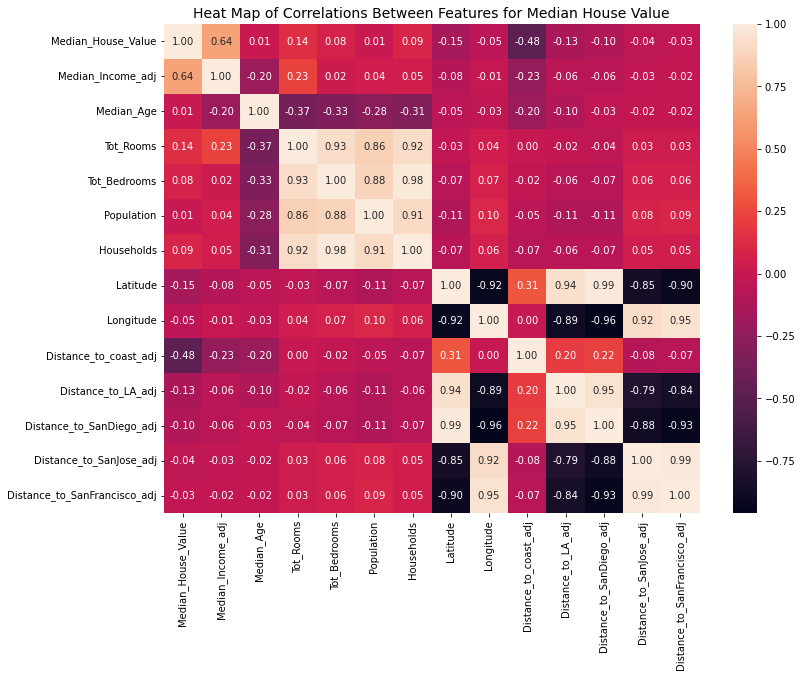

In [165]:
# Remind myself of the correlations between each pair of variables.

f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(round(house_data.corr(), 2), annot = True, fmt = '.2f')
plt.title('Heat Map of Correlations Between Features for Median House Value', fontsize = 14)
plt.show()

In [629]:
# Since we will be using statsmodels' OLS package, add a column of constants to the two sets of independent variables.

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
X_train

,const,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
0,1.0,0.347800,0.240000,0.067704,0.080087,0.041061,0.085362,0.189160,0.585657,0.100989,0.035275,0.179909,0.544218,0.579302
1,1.0,0.178861,0.640000,0.036396,0.045941,0.023011,0.049342,0.545165,0.335657,0.192332,0.463096,0.543656,0.105429,0.141409
2,1.0,0.248446,0.500000,0.026858,0.035698,0.024889,0.039638,0.255048,0.388446,0.057921,0.220646,0.326984,0.353548,0.399886
3,1.0,0.193472,0.060000,0.059515,0.092038,0.042462,0.089309,0.069075,0.706175,0.033856,0.129510,0.044348,0.745395,0.765560
4,1.0,0.116755,0.540000,0.039676,0.100264,0.055243,0.097862,0.164718,0.603586,0.064046,0.005471,0.154460,0.580246,0.612658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13767,1.0,0.094443,0.200000,0.023323,0.030576,0.001850,0.006743,0.812965,0.325697,0.715457,0.714069,0.753279,0.388152,0.323836
13768,1.0,0.186143,0.519677,0.020652,0.033214,0.009081,0.029441,0.639745,0.285857,0.162816,0.568415,0.632985,0.167825,0.133087
13769,1.0,0.081991,0.760000,0.043975,0.074965,0.059194,0.078289,0.130712,0.605578,0.003762,0.030516,0.130100,0.614388,0.644144
13770,1.0,0.242849,0.080000,0.029198,0.047959,0.018078,0.039967,0.526036,0.241036,0.037039,0.497296,0.572441,0.020247,0.059603


In [167]:
# Define function to plot actual vs. predicted values, including a diagonal 1:1 line for the ideal scenario, and a dotted line on 'y = 0' to better visualize values predicted as below 0.

def plot_results(y_test, y_pred, plot_title):
    plt.figure(figsize = (8, 8))
    plt.scatter(y_test, y_pred)
    plt.plot([x for x in range(0, 500000)], [y for y in range(0, 500000)], color = 'red')
    plt.axhline(y = 0, color = 'green', ls = '--')
    plt.title(plot_title)
    plt.xlabel('Actual median house values')
    plt.ylabel('Predicted median house values')
    plt.show()

In [565]:
# Define function to calculate RMSE between predicted and actual median house values.
# (For future reference: Next time we can simply import and call the following:
#     from sklearn.metrics import mean_squared_error
#     mean_squared_error(y_test, y_pred, squared = False))

def rmse(y_pred, y_test):
    comparisons = y_test.copy()
    comparisons.rename(columns = {'Median_House_Value': 'actual'}, inplace = True)
    comparisons['pred'] = y_pred
    print('Average difference between predicted and actual median house values: ' + str(np.sqrt(((comparisons['pred'] - comparisons['actual']) ** 2).mean())))

In [549]:
# Define function to take a deeper look at actual vs. predicted values.

def act_vs_pred(X_test, y_test, y_pred):
    global comparisons
    comparisons = y_test.copy()
    comparisons.rename(columns = {'Median_House_Value': 'actual'}, inplace = True)
    temp_col_names = []
    for col in X_test.columns:
        comparisons[col] = X_test[col]
        temp_col_names.append(col)
    comparisons['pred'] = y_pred
    comparisons['diff'] = comparisons['actual'] - comparisons['pred']
    temp_col_names.extend(['actual', 'pred', 'diff'])
    comparisons = comparisons[temp_col_names]
    return comparisons

In [584]:
# Define function to plot histogram of differences between actual and predicted values.

def act_pred_diff_hist(y_test, y_pred, plot_title):
    comparisons = y_test.copy()
    comparisons.rename(columns = {'Median_House_Value': 'actual'}, inplace = True)
    comparisons['pred'] = y_pred
    comparisons['diff'] = comparisons['actual'] - comparisons['pred']

    plt.figure(figsize = (12, 8))
    hist_bins = np.arange(-400000, 400001, 25000)
    n, bins, patches = plt.hist(comparisons['diff'], bins = hist_bins, edgecolor = 'black')
    plt.title(plot_title)
    plt.xlabel('Difference')
    plt.ylabel('Count')
    plt.show()

    print('Percentage of predictions off by between -50,000 and 0: ' + str(n[14] + n[15]) + ' / ' + str(sum(n)) + ' = ' + str(round((n[14] + n[15]) / sum(n), 4)))
    print('Percentage of predictions off by between 0 and 50,000:  ' + str(n[16] + n[17]) + ' / ' + str(sum(n)) + ' = ' + str(round((n[16] + n[17]) / sum(n), 4)))
    print('Percentage of predictions off by up to 50,000:          ' + str(n[14] + n[15] + n[16] + n[17]) + ' / ' + str(sum(n)) + ' = ' + str(round((n[14] + n[15] + n[16] + n[17]) / sum(n), 4)))

    print('\nPercentage of predictions off by between -25,000 and 0: ' + str(n[15]) + ' / ' + str(sum(n)) + ' = ' + str(round(n[15] / sum(n), 4)))
    print('Percentage of predictions off by between 0 and 25,000:  ' + str(n[16]) + ' / ' + str(sum(n)) + ' = ' + str(round(n[16] / sum(n), 4)))
    print('Percentage of predictions off by up to 25,000:          ' + str(n[15] + n[16]) + ' / ' + str(sum(n)) + ' = ' + str(round((n[15] + n[16]) / sum(n), 4)))

__1st model__: Create a linear regression model using all features, to have a baseline.

In [631]:
# Build the model.

kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
r2_scores = []

for train_index, test_index in kfold.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    LRmodel_all_test = sm.OLS(y_train_cv, X_train_cv)
    LRmodel_all_results_test = LRmodel_all_test.fit()
    r2_scores.append(LRmodel_all_results_test.rsquared)

r2_scores

[0.6056178336901431,
 0.6091166226677999,
 0.605932298778011,
 0.6075821082632746,
 0.6194575926078728]

In [630]:
# Build the model.

LRmodel_all = sm.OLS(y_train, X_train)

LRmodel_all_results = LRmodel_all.fit()

LRmodel_all_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Median_House_Value   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1651.
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:34:20   Log-Likelihood:            -1.7122e+05
No. Observations:               13772   AIC:                         3.425e+05
Df Residuals:                   13758   BIC:                         3.426e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         2.587e+05   1.26e+04     20.497      0.000    2.34e+05    2.83e+05
Median_Income_adj             4.787e+05   5725.040     83.611      0.000    4.67e+05     4.9e+05
Median_Age                    1.959e+04   2730.902      7.174      0.000    1.42e+04    2.49e+04
Tot_Rooms                    -2.683e+05   3.43e+04     -7.820      0.000   -3.36e+05   -2.01e+05
Tot_Bedrooms                  5.557e+05   4.72e+04     11.776      0.000    4.63e+05    6.48e+05
Population                   -1.297e+06    4.4e+04    -29.450      0.000   -1.38e+06   -1.21e+06
Households                    3.366e+05   4.81e+04      7.006      0.000    2.42e+05    4.31e+05
Latitude                     -3.958e+05   2.81e+04    -14.082      0.000   -4.51e+05   -3.41e+05
Longitude                    -2.425e+05   1.79e+04    -13.563      0.000   -2.78e+05   -2.07e+05
Distance_to_coast_adj        -7.831e+04   7031.452    -11.137      0.000   -9.21e+04   -6.45e+04
Distance_to_LA_adj           -1.555e+05   8356.053    -18.610      0.000   -1.72e+05   -1.39e+05
Distance_to_SanDiego_adj      2.934e+05   3.57e+04      8.224      0.000    2.23e+05    3.63e+05
Distance_to_SanJose_adj       1.567e+05   2.07e+04      7.589      0.000    1.16e+05    1.97e+05
Distance_to_SanFrancisco_adj -1.536e+05   2.38e+04     -6.444      0.000      -2e+05   -1.07e+05
==============================================================================
Omnibus:                     2670.782   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6649.046
Skew:                           1.073   Prob(JB):                         0.00
Kurtosis:                       5.642   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
# Use the model to predict median house value among the test set.

y_pred_all = LRmodel_all_results.predict(X_test)

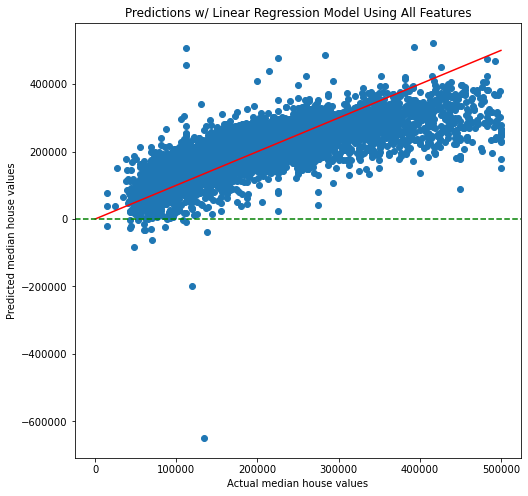

In [531]:
# Plot predictions for model that uses all features.

plot_results(y_test, y_pred_all, 'Predictions w/ Linear Regression Model Using All Features')

In [530]:
# Take a deeper look at the actual vs. predicted values.

act_vs_pred(X_test, y_test, y_pred_all)

,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj,actual,pred,diff
0,0.105615,0.460000,0.063355,0.107248,0.039715,0.105428,0.027630,0.736056,0.070364,0.179616,0.017150,0.806540,0.822170,104200.0,127094.646145,-22894.646145
1,0.293411,0.260000,0.049443,0.071551,0.033689,0.063816,0.041445,0.718127,0.034193,0.158144,0.019571,0.780346,0.797919,171200.0,196154.629376,-24954.629376
2,0.280539,0.519677,0.042754,0.040975,0.018022,0.041776,0.170032,0.703187,0.243019,0.086393,0.132346,0.652938,0.679496,97300.0,171627.722615,-74327.722615
3,0.240208,0.400000,0.038430,0.049201,0.026346,0.049178,0.895855,0.033865,0.030625,0.905085,0.919750,0.529610,0.420662,102700.0,163219.550459,-60519.550459
4,0.134419,0.660000,0.059769,0.094366,0.031503,0.097039,0.646121,0.295817,0.189486,0.569744,0.633900,0.178410,0.145079,116500.0,124923.274373,-8423.274373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5898,0.077326,0.860000,0.015031,0.020798,0.010118,0.019572,0.300744,0.531873,0.356258,0.159156,0.284411,0.403818,0.448923,66000.0,90643.700427,-24643.700427
5899,0.159498,0.600000,0.044153,0.065187,0.020825,0.058059,0.470776,0.240040,0.018568,0.457389,0.537213,0.048173,0.109531,330800.0,194921.319418,135878.680582
5900,0.290572,0.340000,0.122361,0.131460,0.065305,0.138322,0.622742,0.297809,0.122209,0.548161,0.615754,0.151543,0.128793,144400.0,177648.191432,-33248.191432
5901,0.266853,0.900000,0.001272,0.001707,0.001570,0.001809,0.061637,0.721116,0.058355,0.144563,0.037381,0.763410,0.782238,200000.0,187355.872238,12644.127762


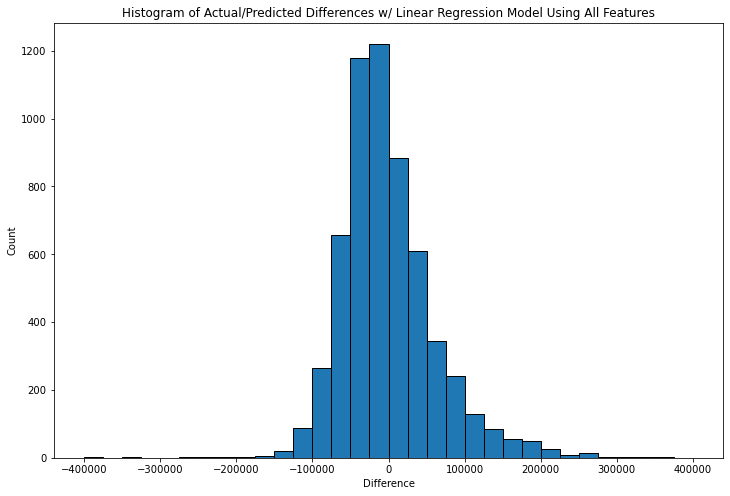

Percentage of predictions off by between -50,000 and 0: 2400.0 / 5902.0 = 0.4066
Percentage of predictions off by between 0 and 50,000:  1492.0 / 5902.0 = 0.2528
Percentage of predictions off by up to 50,000:          3892.0 / 5902.0 = 0.6594

Percentage of predictions off by between -25,000 and 0: 1221.0 / 5902.0 = 0.2069
Percentage of predictions off by between 0 and 25,000:  883.0 / 5902.0 = 0.1496
Percentage of predictions off by up to 25,000:          2104.0 / 5902.0 = 0.3565


In [585]:
act_pred_diff_hist(y_test, y_pred_all, 'Histogram of Actual/Predicted Differences w/ Linear Regression Model Using All Features')

In [566]:
# Calculate the RMSE of this model.

rmse(y_pred_all, y_test)

Average difference between predicted and actual median house values: 62431.91679260641


__Takeaways of 1st model__:

 - From eyeballing the predictions dot plot:
    - The predicted median house values have a large spread in either direction compared to what they actually are, appearing to be up to several hundred thousand off.
    - There are many negative predictions, including a couple that are approximately -200,000 and -650,000, obviously none of which can be accurate. Since this is purely a baseline model, we won't delve into what is driving the negative predictions.
    - The model appears to underpredict more and more as the actual value increases, entirely underpredicting after actual values increase to ~425,000.
 - From eyeballing the differences histogram:
    - Only 66% of predictions are within 50,000 of the actual value, and 36% are within 25,000. This suggests that every third prediction will be potentially inaccurate beyond usefulness, and only a third of predictions will be largely accurate.
    - The data is skewed right - about 50% more values are underpredicted than overpredicted. This is consistent with how the dot plot appears.
 - The summary statistics give an R-squared value of 0.609. This correlation could be considered middle of the road, boosted by the fact that we are considering all of the features that actually matter, but also all of the features that don't.
 - The summary statistics give an F-statistic of 1,651 and a p-value of ~0. This indicates that the model is much stronger than one that is purely random.
 - The RMSE is 62,432, indicating that on average the actual value is 62,432 away from the predicted. Considering that the actual median house values range from 14,999 to 500,000, this doesn't seem very good.

__2nd model__: Create a linear regression model using the two features that may have some distinct correlation with the dependent variable, median income and distance to coast.

In [173]:
# Declare features to use in both training and test sets.

X_train_discorr = X_train[['Median_Income_adj', 'Distance_to_coast_adj']]
X_test_discorr = X_test[['Median_Income_adj', 'Distance_to_coast_adj']]
X_train_discorr

,Median_Income_adj,Distance_to_coast_adj
0,0.347800,0.100989
1,0.178861,0.192332
2,0.248446,0.057921
3,0.193472,0.033856
4,0.116755,0.064046
...,...,...
13767,0.094443,0.715457
13768,0.186143,0.162816
13769,0.081991,0.003762
13770,0.242849,0.037039


In [174]:
# Build the model.

LRmodel_discorr = sm.OLS(y_train, X_train_discorr)

LRmodel_discorr_results = LRmodel_discorr.fit()

LRmodel_discorr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Median_House_Value   R-squared (uncentered):                   0.867
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                          4.491e+04
Date:                Sat, 19 Nov 2022   Prob (F-statistic):                        0.00
Time:                        21:17:53   Log-Likelihood:                     -1.7476e+05
No. Observations:               13772   AIC:                                  3.495e+05
Df Residuals:                   13770   BIC:                                  3.495e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Median_Income_adj      7.467e+05   2766.758    269.873      0.000    7.41e+05    7.52e+05
Distance_to_coast_adj -8.342e+04   3923.992    -21.260      0.000   -9.11e+04   -7.57e+04
==============================================================================
Omnibus:                     1659.713   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3635.723
Skew:                           0.736   Prob(JB):                         0.00
Kurtosis:                       5.042   Cond. No.                         1.93
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
# Use the model to predict median house value among the test set.

y_pred_discorr = LRmodel_discorr_results.predict(X_test_discorr)

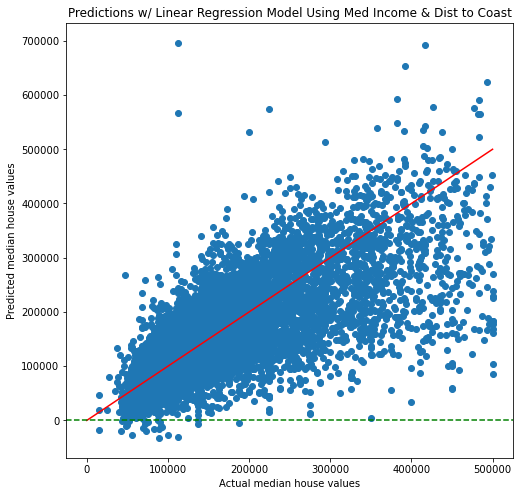

In [563]:
# Plot predictions for model that uses the two features with potentially distinct correlation.

plot_results(y_test, y_pred_discorr, 'Predictions w/ Linear Regression Model Using Med Income & Dist to Coast')

In [553]:
# Take a deeper look at the actual vs. predicted values.

act_vs_pred(X_test_discorr, y_test, y_pred_discorr)

,Median_Income_adj,Distance_to_coast_adj,actual,pred,diff
0,0.105615,0.070364,104200.0,72990.031820,31209.968180
1,0.293411,0.034193,171200.0,216229.481600,-45029.481600
2,0.280539,0.243019,97300.0,189197.383221,-91897.383221
3,0.240208,0.030625,102700.0,176801.987049,-74101.987049
4,0.134419,0.189486,116500.0,84559.141101,31940.858899
...,...,...,...,...,...
5898,0.077326,0.356258,66000.0,28016.645797,37983.354203
5899,0.159498,0.018568,330800.0,117544.029037,213255.970963
5900,0.290572,0.122209,144400.0,206767.499085,-62367.499085
5901,0.266853,0.058355,200000.0,194383.647093,5616.352907


In [554]:
# Take a deeper look at the negative values.

comparisons[comparisons['pred'] < 0].sort_values(by = 'actual')

,Median_Income_adj,Distance_to_coast_adj,actual,pred,diff
3717,0.002854,0.235399,14999.0,-17506.728699,32505.728699
1247,0.025720,0.465107,42500.0,-19596.730295,62096.730295
3747,0.058073,0.522546,43300.0,-231.059541,43531.059541
2862,0.043344,0.516422,48500.0,-10718.473725,59218.473725
4447,0.056152,0.531372,49100.0,-2401.901862,51501.901862
5371,0.028780,0.363009,49400.0,-8794.632113,58194.632113
744,0.052246,0.475283,51700.0,-639.128244,52339.128244
850,0.022146,0.530842,55500.0,-27748.963088,83248.963088
2096,0.036109,0.499301,69000.0,-14691.968044,83691.968044
5322,0.047147,0.496841,72300.0,-6245.373404,78545.373404


In [556]:
# Take a deeper look at the more extreme differences.

comparisons[comparisons['diff'] < -200000].sort_values(by = 'diff', ascending = False)

,Median_Income_adj,Distance_to_coast_adj,actual,pred,diff
5789,0.536931,0.523607,155600.0,357231.036747,-201631.036747
301,0.532678,0.287388,171900.0,373761.227728,-201861.227728
366,0.566367,0.182879,204800.0,407634.980196,-202834.980196
2666,0.612012,0.185387,235200.0,441507.161216,-206307.161216
3519,0.819392,0.232698,381800.0,592405.388768,-210605.388768
902,0.438234,0.012009,110000.0,326216.179703,-216216.179703
746,0.544300,0.196865,172200.0,389991.306572,-217791.306572
1542,0.614637,0.540005,193500.0,413883.531953,-220383.531953
247,0.696769,0.075428,293500.0,513966.804944,-220466.804944
3280,0.382478,0.208102,47500.0,268225.199469,-220725.199469


In [557]:
len(comparisons[comparisons['diff'] > 200000])

147

In [558]:
comparisons[comparisons['diff'] > 300000].sort_values(by = 'diff')

,Median_Income_adj,Distance_to_coast_adj,actual,pred,diff
3537,0.150026,0.059609,410700.0,107047.672135,303652.327865
4362,0.129224,0.006897,400000.0,95912.851361,304087.148639
4235,0.254273,0.005787,494400.0,189376.484428,305023.515572
3903,0.241157,0.126549,476700.0,169507.993856,307192.006144
5130,0.203553,0.021413,457700.0,150201.426145,307498.573855
5727,0.206139,0.001061,464300.0,153829.747856,310470.252144
3536,0.175959,0.009694,444400.0,130575.587035,313824.412965
2767,0.247086,0.009887,500000.0,183668.141995,316331.858005
822,0.223493,0.001592,483300.0,166743.859620,316556.140380
2382,0.246067,0.008922,500000.0,182987.046364,317012.953636


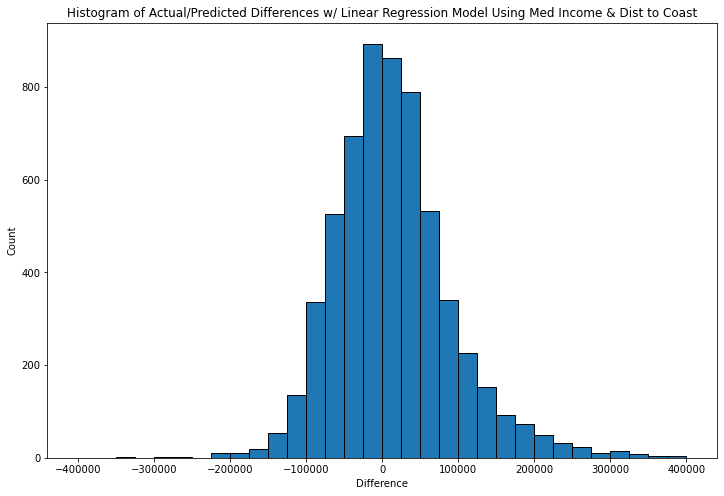

Percentage of predictions off by between -50,000 and 0: 1589.0 / 5900.0 = 0.2693
Percentage of predictions off by between 0 and 50,000:  1653.0 / 5900.0 = 0.2802
Percentage of predictions off by up to 50,000:          3242.0 / 5900.0 = 0.5495

Percentage of predictions off by between -25,000 and 0: 894.0 / 5900.0 = 0.1515
Percentage of predictions off by between 0 and 25,000:  863.0 / 5900.0 = 0.1463
Percentage of predictions off by up to 25,000:          1757.0 / 5900.0 = 0.2978


In [586]:
act_pred_diff_hist(y_test, y_pred_discorr, 'Histogram of Actual/Predicted Differences w/ Linear Regression Model Using Med Income & Dist to Coast')

In [594]:
# Calculate the RMSE of this model.

rmse(y_pred_discorr, y_test)

Average difference between predicted and actual median house values: 79468.35564100769


__Takeaways of 2nd model__:

 - From eyeballing the predictions dot plot: 
    - The predicted median house values, when the actual value is ~200,000 or less, have much less spread in either direction compared to the baseline, appearing to be generally 50,000-100,000 off. However, as the actual value increases past 200,000, the spread greatly increases to once again being several hundreds of thousands off.
    - There are much fewer negative predictions, only 22, all of which are not extremely negative, and all for actual values of less than 200,000. The model seems to do a good job of not extremely underpredicting. However...
    - The model still appears to underpredict more and more as the actual value increases, and while not entirely unpredicting at any point, to underpredict with more and more difference.
    - There are four actual values that were overpredicted by more than 300,000, with the largest overprediction having a difference of 583,995. Because there are many fewer overpredictions compared to underpredictions, it may make more to sense to focus on the latter for now.
    - Visually, like the previous model, predicted values tend to curve downward as actual values increase. Perhaps taking the log of a feature could straighten it out.
 - From eyeballing the differences histogram:
    - Only 55% of predictions are within 50,000 of the actual value, and 30% are within 25,000. Predictions in this model are even less reliable than in the baseline.
    - When closer to a difference of 0, the data is more normalized - the numbers of underpredictions and overpredictions within 50,000 are about the same. However, visually, there is also a greater number of larger overpredictions.
 - The summary statistics give an R-squared value of 0.867. This correlation is much better than that of the previous model and quite good on its own.
 - The summary statistics give an F-statistic of 4,491 and a p-value of ~0. This indicates that the model is much stronger than one that is purely random.
 - The RMSE is 79,468, indicating that on average the actual value is 79,468 away from the predicted. Despite having a much higher R-squared value than the previous model, this model actually has a worse RMSE. This is likely driven by the differences in the higher actual values, as visualized by the plot, which shows them fanning out more as the actual value increases.

__3rd model__: Create a linear regression model using the two features that may have some distinct correlation with the dependent variable, median income and distance to coast, and also taking the log of the latter feature.

In [184]:
# Declare features to use in both training and test sets.

X_train_discorr_logDtc = pd.DataFrame()
X_train_discorr_logDtc['Median_Income_adj'] = X_train['Median_Income_adj']
X_train_discorr_logDtc['Distance_to_coast_adj'] = X_train['Distance_to_coast_adj']
X_train_discorr_logDtc['Median_House_Value'] = y_train['Median_House_Value']                                     # Doing this so that the next line evens the lengths of the X and y sets.
X_train_discorr_logDtc = X_train_discorr_logDtc[X_train_discorr_logDtc['Distance_to_coast_adj'] > 0]             # Doing this so that taking the log of 'Distance_to_coast_adj' doesn't result in -inf values.
X_train_discorr_logDtc['Distance_to_coast_adj_log'] = np.log10(X_train_discorr_logDtc['Distance_to_coast_adj'])

X_test_discorr_logDtc = pd.DataFrame()
X_test_discorr_logDtc['Median_Income_adj'] = X_test['Median_Income_adj']
X_test_discorr_logDtc['Distance_to_coast_adj'] = X_test['Distance_to_coast_adj']
X_test_discorr_logDtc['Median_House_Value'] = y_test['Median_House_Value']                                       # Doing this so that the next line evens the lengths of the X and y sets.
X_test_discorr_logDtc = X_test_discorr_logDtc[X_test_discorr_logDtc['Distance_to_coast_adj'] > 0]                # Doing this so that taking the log of 'Distance_to_coast_adj' doesn't result in -inf values.
X_test_discorr_logDtc['Distance_to_coast_adj_log'] = np.log10(X_test_discorr_logDtc['Distance_to_coast_adj'])

y_train_logDtc = pd.DataFrame(X_train_discorr_logDtc['Median_House_Value'])
y_test_logDtc = pd.DataFrame(X_test_discorr_logDtc['Median_House_Value'])
X_train_discorr_logDtc = X_train_discorr_logDtc.drop(columns = ['Distance_to_coast_adj', 'Median_House_Value'])
X_test_discorr_logDtc = X_test_discorr_logDtc.drop(columns = ['Distance_to_coast_adj', 'Median_House_Value'])

In [185]:
# Build the model.

LRmodel_discorr_logDtc = sm.OLS(y_train_logDtc, X_train_discorr_logDtc)

LRmodel_discorr_logDtc_results = LRmodel_discorr_logDtc.fit()

LRmodel_discorr_logDtc_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Median_House_Value   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                          7.035e+04
Date:                Sat, 19 Nov 2022   Prob (F-statistic):                        0.00
Time:                        21:17:55   Log-Likelihood:                     -1.7198e+05
No. Observations:               13770   AIC:                                  3.440e+05
Df Residuals:                   13768   BIC:                                  3.440e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Median_Income_adj          4.414e+05   3755.920    117.510      0.000    4.34e+05    4.49e+05
Distance_to_coast_adj_log -6.997e+04    811.463    -86.231      0.000   -7.16e+04   -6.84e+04
==============================================================================
Omnibus:                     2284.007   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4945.562
Skew:                           0.978   Prob(JB):                         0.00
Kurtosis:                       5.189   Cond. No.                         9.15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
# Use the model to predict median house value among the test set.

y_pred_discorr_logDtc = LRmodel_discorr_logDtc_results.predict(X_test_discorr_logDtc)

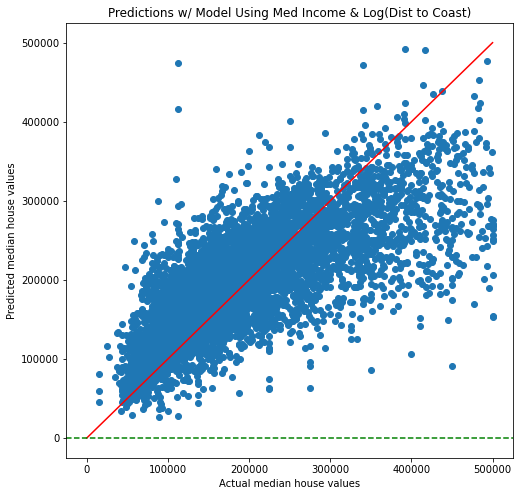

In [187]:
# Plot predictions for model that uses the two features with potentially distinct correlation, with one of them logged.

plot_results(y_test_logDtc, y_pred_discorr_logDtc, 'Predictions w/ Linear Regression Model Using Med Income & Log(Dist to Coast)')

In [560]:
# Take a deeper look at all of the actual vs. predicted values.

act_vs_pred(X_test_discorr_logDtc, y_test_logDtc, y_pred_discorr_logDtc)

,Median_Income_adj,Distance_to_coast_adj_log,actual,pred,diff
0,0.105615,-1.152649,104200.0,127268.926710,-23068.926710
1,0.293411,-1.466058,171200.0,232084.563799,-60884.563799
2,0.280539,-0.614360,97300.0,166807.345924,-69507.345924
3,0.240208,-1.513930,102700.0,211952.730858,-109252.730858
4,0.134419,-0.722422,116500.0,109877.218592,6622.781408
...,...,...,...,...,...
5898,0.077326,-0.448236,66000.0,65492.994997,507.005003
5899,0.159498,-1.731243,330800.0,191536.830485,139263.169515
5900,0.290572,-0.912897,144400.0,192125.338592,-47725.338592
5901,0.266853,-1.233919,200000.0,204119.402000,-4119.402000


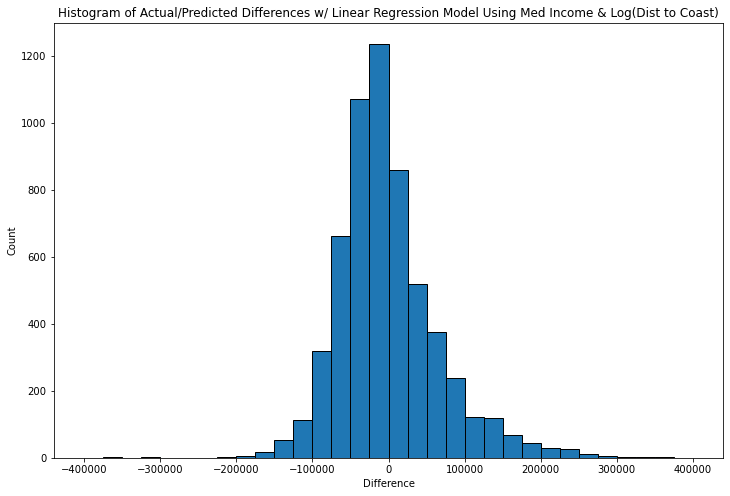

Percentage of predictions off by between -50,000 and 0: 2308.0 / 5902.0 = 0.3911
Percentage of predictions off by between 0 and 50,000:  1376.0 / 5902.0 = 0.2331
Percentage of predictions off by up to 50,000:          3684.0 / 5902.0 = 0.6242

Percentage of predictions off by between -25,000 and 0: 1236.0 / 5902.0 = 0.2094
Percentage of predictions off by between 0 and 25,000:  858.0 / 5902.0 = 0.1454
Percentage of predictions off by up to 25,000:          2094.0 / 5902.0 = 0.3548


In [587]:
act_pred_diff_hist(y_test_logDtc, y_pred_discorr_logDtc, 'Histogram of Actual/Predicted Differences w/ Linear Regression Model Using Med Income & Log(Dist to Coast)')

In [567]:
# Calculate the RMSE of this model.

rmse(y_pred_discorr_logDtc, y_test_logDtc)

Average difference between predicted and actual median house values: 65901.45938214028


__Takeaways of 3rd model__:

 - From eyeballing the predictions dot plot:
    - The spread of predicted median house values as the actual values increase has decreased compared to the previous model.
    - There are no negative predictions. 
    - The model still appears to underpredict more and more as the actual value increases, and with more and more difference, although it is underpredicting less than does the previous model.
    - Visually, like the previous model, predicted values tend to curve downward as actual values increase.
 - From eyeballing the differences histogram:
    - The percentages of predictions within 50,000 and 25,000 of the actual value are both similar to those of the baseline model, as is the skewness (not great).
 - The summary statistics give an R-squared value of 0.911. This correlation is even better than that of the previous model, which was already pretty good.
 - The RMSE is 65,901, indicating that on average the actual value is 65,901 away from the predicted. This is better than the previous model's RMSE, although slightly worse than the first model's, while also having the best R-squared value. It's getting hard to tell now whether an RMSE in this range is actually good or bad, since it hasn't varied much across the different models.

__4th model__: Create a linear regression model using the best X features as determined via SelectKBest.

In [190]:
# Determine the optimal number of features to use in the model.

select_num_rsq_array = []
select_num_rmse_array = []

for i in range(2, 14):
    select_num = i
    select = SelectKBest(k = select_num)
    X_train_select = select.fit_transform(X_train, np.ravel(y_train))
    selected = select.get_support()
    cols_selected = X_train.columns[selected]

    X_train_selectKbest = X_train[cols_selected]
    X_test_selectKbest = X_test[cols_selected]

    LRmodel_selectKbest = sm.OLS(y_train, X_train_selectKbest)
    LRmodel_selectKbest_results = LRmodel_selectKbest.fit()
    select_num_rsq_array.append(LRmodel_selectKbest_results.rsquared)

    y_pred_selectKbest = LRmodel_selectKbest_results.predict(X_test_selectKbest)
    comparisons_selectKbest = y_test.copy()
    comparisons_selectKbest.rename(columns = {'Median_House_Value': 'actual'}, inplace = True)
    comparisons_selectKbest['pred'] = y_pred_selectKbest
    select_num_rmse_array.append(np.sqrt(((comparisons_selectKbest['pred'] - comparisons_selectKbest['actual']) ** 2).mean()))

c:\Users\Dan\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Dan\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Dan\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Dan\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Dan\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\

In [191]:
select_num_rmse_array

[79468.35564100769,
 78451.12753391324,
 77680.24491240186,
 77479.8960963347,
 74343.46844327076,
 69382.72927612843,
 68091.51586624995,
 67133.72538387586,
 64397.05229310711,
 64306.40631750541,
 63893.54703137605,
 63560.84681537761]

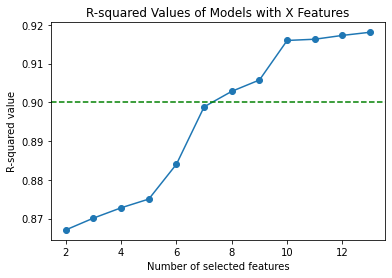

In [192]:
plt.plot(range(2, 14), select_num_rsq_array, marker = 'o')
plt.axhline(y = .90, color = 'green', ls = '--')
plt.xlabel('Number of selected features')
plt.ylabel('R-squared value')
plt.title('R-squared Values of Models with X Features')
plt.show()

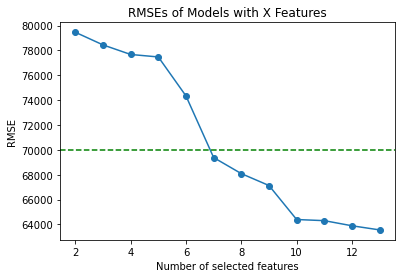

In [193]:
plt.plot(range(2, 14), select_num_rmse_array, marker = 'o')
plt.axhline(y = 70000, color = 'green', ls = '--')
plt.xlabel('Number of selected features')
plt.ylabel('RMSE')
plt.title('RMSEs of Models with X Features')
plt.show()

In [568]:
# Because no more significant increases in R^2 or dropoffs in error occur when using more than 10 features, we will use 10 features in the model.

In [194]:
# Determine features to use in model.

select_num = 10
select = SelectKBest(k = select_num)
X_train_select = select.fit_transform(X_train, y_train)
selected = select.get_support()
cols_selected = X_train.columns[selected]
cols_selected

c:\Users\Dan\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dan\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Dan\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Index(['Median_Income_adj', 'Tot_Rooms', 'Tot_Bedrooms', 'Population',
       'Households', 'Latitude', 'Distance_to_coast_adj', 'Distance_to_LA_adj',
       'Distance_to_SanDiego_adj', 'Distance_to_SanJose_adj'],
      dtype='object')

In [195]:
X_train_selectKbest = X_train[cols_selected]
X_test_selectKbest = X_test[cols_selected]
X_train_selectKbest

,Median_Income_adj,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj
0,0.347800,0.067704,0.080087,0.041061,0.085362,0.189160,0.100989,0.035275,0.179909,0.544218
1,0.178861,0.036396,0.045941,0.023011,0.049342,0.545165,0.192332,0.463096,0.543656,0.105429
2,0.248446,0.026858,0.035698,0.024889,0.039638,0.255048,0.057921,0.220646,0.326984,0.353548
3,0.193472,0.059515,0.092038,0.042462,0.089309,0.069075,0.033856,0.129510,0.044348,0.745395
4,0.116755,0.039676,0.100264,0.055243,0.097862,0.164718,0.064046,0.005471,0.154460,0.580246
...,...,...,...,...,...,...,...,...,...,...
13767,0.094443,0.023323,0.030576,0.001850,0.006743,0.812965,0.715457,0.714069,0.753279,0.388152
13768,0.186143,0.020652,0.033214,0.009081,0.029441,0.639745,0.162816,0.568415,0.632985,0.167825
13769,0.081991,0.043975,0.074965,0.059194,0.078289,0.130712,0.003762,0.030516,0.130100,0.614388
13770,0.242849,0.029198,0.047959,0.018078,0.039967,0.526036,0.037039,0.497296,0.572441,0.020247


In [196]:
# Build the model.

LRmodel_selectKbest = sm.OLS(y_train, X_train_selectKbest)

LRmodel_selectKbest_results = LRmodel_selectKbest.fit()

LRmodel_selectKbest_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Median_House_Value   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                          1.500e+04
Date:                Sat, 19 Nov 2022   Prob (F-statistic):                        0.00
Time:                        21:18:01   Log-Likelihood:                     -1.7160e+05
No. Observations:               13772   AIC:                                  3.432e+05
Df Residuals:                   13762   BIC:                                  3.433e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Median_Income_adj         5.235e+05   5127.214    102.095      0.000    5.13e+05    5.34e+05
Tot_Rooms                -4.534e+05   3.42e+04    -13.265      0.000    -5.2e+05   -3.86e+05
Tot_Bedrooms              5.466e+05   4.78e+04     11.426      0.000    4.53e+05     6.4e+05
Population               -1.244e+06   4.48e+04    -27.740      0.000   -1.33e+06   -1.16e+06
Households                4.831e+05   4.89e+04      9.881      0.000    3.87e+05    5.79e+05
Latitude                 -6.325e+05   2.66e+04    -23.741      0.000   -6.85e+05    -5.8e+05
Distance_to_coast_adj    -1.343e+05   5332.573    -25.184      0.000   -1.45e+05   -1.24e+05
Distance_to_LA_adj       -2.518e+05   7310.539    -34.439      0.000   -2.66e+05   -2.37e+05
Distance_to_SanDiego_adj  9.209e+05   2.65e+04     34.781      0.000    8.69e+05    9.73e+05
Distance_to_SanJose_adj    9.78e+04   2393.308     40.865      0.000    9.31e+04    1.02e+05
==============================================================================
Omnibus:                     2353.367   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5901.966
Skew:                           0.952   Prob(JB):                         0.00
Kurtosis:                       5.581   Cond. No.                         104.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
# Use the model to predict median house value among the test set.

y_pred_selectKbest = LRmodel_selectKbest_results.predict(X_test_selectKbest)

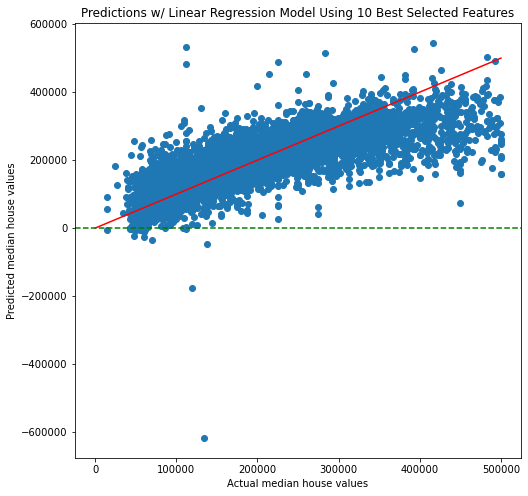

In [569]:
# Plot predictions for model that uses the 10 best selected features.

plot_results(y_test, y_pred_selectKbest, 'Predictions w/ Linear Regression Model Using ' + str(select_num) + ' Best Selected Features')

In [570]:
# Take a deeper look at the actual vs. predicted prices.

act_vs_pred(X_test_selectKbest, y_test, y_pred_selectKbest)

,Median_Income_adj,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,actual,pred,diff
0,0.105615,0.063355,0.107248,0.039715,0.105428,0.027630,0.070364,0.179616,0.017150,0.806540,104200.0,109250.386959,-5050.386959
1,0.293411,0.049443,0.071551,0.033689,0.063816,0.041445,0.034193,0.158144,0.019571,0.780346,171200.0,182933.074670,-11733.074670
2,0.280539,0.042754,0.040975,0.018022,0.041776,0.170032,0.243019,0.086393,0.132346,0.652938,97300.0,171436.324790,-74136.324790
3,0.240208,0.038430,0.049201,0.026346,0.049178,0.895855,0.030625,0.905085,0.919750,0.529610,102700.0,226378.944363,-123678.944363
4,0.134419,0.059769,0.094366,0.031503,0.097039,0.646121,0.189486,0.569744,0.633900,0.178410,116500.0,126189.400495,-9689.400495
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5898,0.077326,0.015031,0.020798,0.010118,0.019572,0.300744,0.356258,0.159156,0.284411,0.403818,66000.0,65173.943536,826.056464
5899,0.159498,0.044153,0.065187,0.020825,0.058059,0.470776,0.018568,0.457389,0.537213,0.048173,330800.0,185267.120590,145532.879410
5900,0.290572,0.122361,0.131460,0.065305,0.138322,0.622742,0.122209,0.548161,0.615754,0.151543,144400.0,187649.719670,-43249.719670
5901,0.266853,0.001272,0.001707,0.001570,0.001809,0.061637,0.058355,0.144563,0.037381,0.763410,200000.0,164834.555391,35165.444609


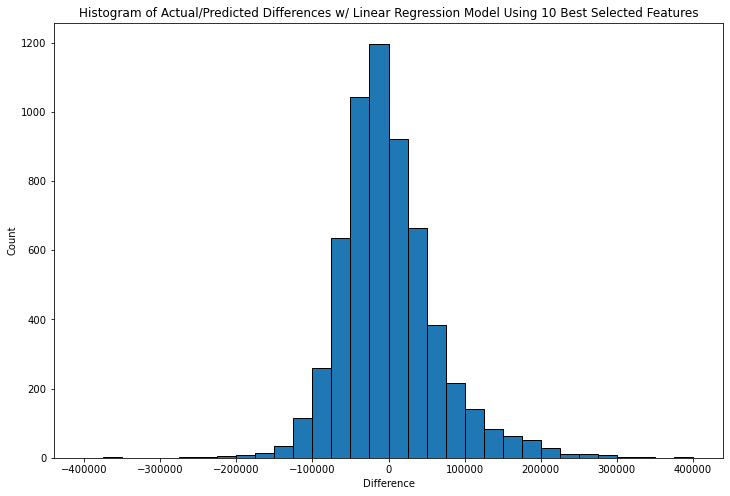

Percentage of predictions off by between -50,000 and 0: 2240.0 / 5901.0 = 0.3796
Percentage of predictions off by between 0 and 50,000:  1586.0 / 5901.0 = 0.2688
Percentage of predictions off by up to 50,000:          3826.0 / 5901.0 = 0.6484

Percentage of predictions off by between -25,000 and 0: 1197.0 / 5901.0 = 0.2028
Percentage of predictions off by between 0 and 25,000:  921.0 / 5901.0 = 0.1561
Percentage of predictions off by up to 25,000:          2118.0 / 5901.0 = 0.3589


In [588]:
act_pred_diff_hist(y_test, y_pred_selectKbest, 'Histogram of Actual/Predicted Differences w/ Linear Regression Model Using ' + str(select_num) + ' Best Selected Features')

In [199]:
# Calculate the RMSE of this model.

rmse(y_pred_selectKbest, y_test)

'Average difference between predicted and actual median house values: 64397.05229310711'

__Takeaways of 4th model__:

 - From eyeballing the predictions dot plot: 
    - The spread of predicted median house values as the actual values increase has decreased compared to the previous model.
    - There are a few negative predictions. Most of them are low in magnitude, but one is approximately -200,000 and another approximately -600,000. 
    - The model still appears to underpredict more and more as the actual value increases, and with more and more difference, although it is underpredicting less than does the previous model.
    - Visually, like the previous model, predicted values tend to curve downward as actual values increase, although much less than the previous model.
 - From eyeballing the differences histogram:
    - Once again, the percentages of predictions within 50,000 and 25,000 of the actual value are both similar to those of the baseline model, as is the skewness. For a dataset of this size and with this few features, perhaps feature selection does not make a large difference.
 - The summary statistics give an R-squared value of 0.916, and the RMSE is 64,397. These are both slightly better than those of the previous model, although this model uses nearly every available feature and may be overfitting.
 - Among the 10 best selected features is latitude. This seems suspicious to use in the model as a quantitative value, since it essentially describes an address and is therefore basically categorical (unless something like climate is being accounted for). Also included are the distances to both LA and San Diego, which we know are highly correlated with each other. Is it better practice to include all selected features since they technically create the model with the best numbers, or to exclude certain features if they don't make conceptual sense within the model?

__5th model__: Create a KNN regression algorithm with X neighbors as determined via GridSearchCV, and using the two features that may have some distinct correlation with the dependent variable.

In [415]:
# HERE FOR REFERENCE ONLY - DETERMINED UNNECESSARY FOR MODELING PURPOSES

# (Cross-checking GridSearchCV: Determine the optimal number of neighbors to use in the algorithm by brute-force checking every number via for-loop.)

train_accuracies = []
test_accuracies = []
neighbors = np.arange(1, 502, 10)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train, np.ravel(y_train))
    train_accuracies.append(knn.score(X_train, np.ravel(y_train)))
    test_accuracies.append(knn.score(X_test, np.ravel(y_test)))

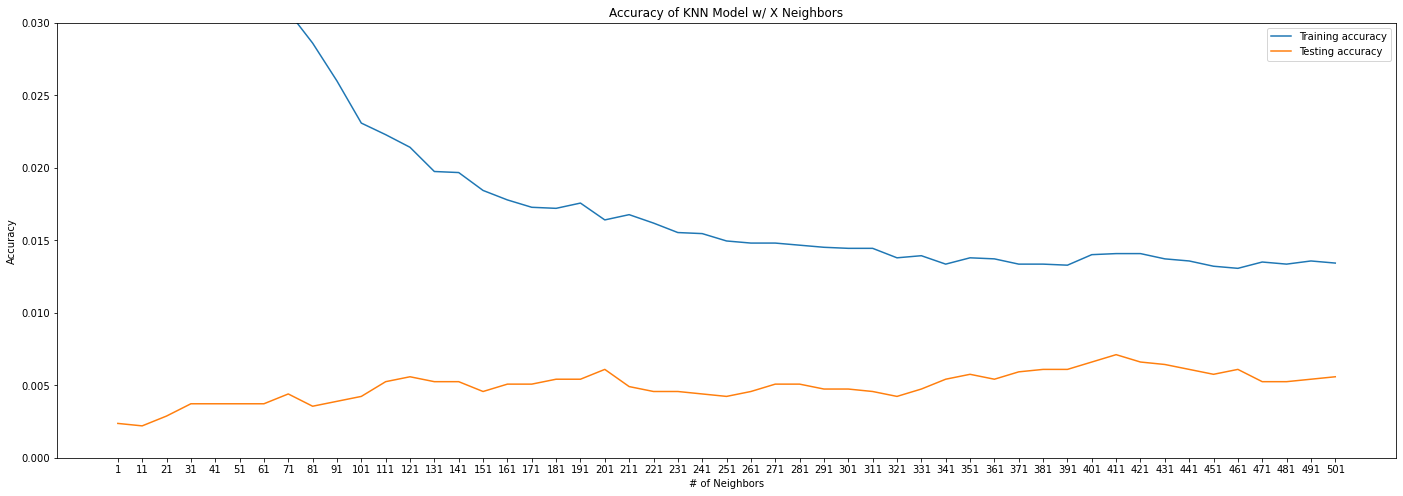

In [416]:
# HERE FOR REFERENCE ONLY - DETERMINED UNNECESSARY FOR MODELING PURPOSES

plt.figure(figsize = (24, 8))
plt.plot(neighbors, train_accuracies, label = 'Training accuracy')
plt.plot(neighbors, test_accuracies, label = 'Testing accuracy')
plt.title('Accuracy of KNN Model w/ X Neighbors')
plt.ylim(top = .03, bottom = 0)
plt.xlabel('# of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(neighbors)
plt.show()

In [417]:
# HERE FOR REFERENCE ONLY - DETERMINED UNNECESSARY FOR MODELING PURPOSES

print('Best # of neighbors: ' + str(list(neighbors)[test_accuracies.index(max(test_accuracies))])
+ ' with a training accuracy of ' + str(round(train_accuracies[test_accuracies.index(max(test_accuracies))], 4))
+ ' and a testing accuracy of ' + str(round(max(test_accuracies), 4)))

Best # of neighbors: 411 with a training accuracy of 0.0141 and a testing accuracy of 0.0071


In [257]:
# Declare features to use in both training and test sets.

X_train_knn_discorr = X_train[['Median_Income_adj', 'Distance_to_coast_adj']]
X_test_knn_discorr = X_test[['Median_Income_adj', 'Distance_to_coast_adj']]
X_train_knn_discorr

,Median_Income_adj,Distance_to_coast_adj
0,0.347800,0.100989
1,0.178861,0.192332
2,0.248446,0.057921
3,0.193472,0.033856
4,0.116755,0.064046
...,...,...
13767,0.094443,0.715457
13768,0.186143,0.162816
13769,0.081991,0.003762
13770,0.242849,0.037039


In [280]:
# Determine the optimal number of neighbors to use in the algorithm, first by determining the approximate neighborhood of the optimal number of neighbors, then by searching around that neighborhood.

param_grid_neighborhood_discorr = {'n_neighbors': np.arange(1, 21, 2)}
knn_neighborhood_discorr = KNeighborsRegressor()
knn_neighborhood_cv_discorr = GridSearchCV(knn_neighborhood_discorr, param_grid_neighborhood_discorr, cv = 5)
knn_neighborhood_cv_discorr.fit(X_train_knn_discorr, y_train)

print('Best score of neighborhoods: ' + str(knn_neighborhood_cv_discorr.best_score_)) # This best score pulls from 'mean_test_score' in the '.cv_results_' attribute.
print('Best neighborhood of number of parameters: ' + str(knn_neighborhood_cv_discorr.best_params_))

Best score of neighborhoods: 0.5765525457436514
Best neighborhood of number of parameters: {'n_neighbors': 19}


In [282]:
neighborhood_num_discorr = list(knn_neighborhood_cv_discorr.best_params_.values())[0]

param_grid_final_discorr = {'n_neighbors': np.arange(neighborhood_num_discorr - 1, neighborhood_num_discorr + 2)}
knn_final_discorr = KNeighborsRegressor()
knn_final_cv_discorr = GridSearchCV(knn_final_discorr, param_grid_final_discorr)
knn_final_cv_discorr.fit(X_train_knn_discorr, y_train)

print('Best final score: ' + str(knn_final_cv_discorr.best_score_))
print('Best final number of parameters: ' + str(knn_final_cv_discorr.best_params_))

Best final score: 0.5778297756700465
Best final number of parameters: {'n_neighbors': 20}


In [283]:
# Build the algorithm.

neighbors_num_discorr = list(knn_final_cv_discorr.best_params_.values())[0]

knn_discorr = KNeighborsRegressor(neighbors_num_discorr)
knn_discorr.fit(X_train_knn_discorr, y_train)

KNeighborsRegressor(n_neighbors=20)

In [284]:
# Use the algorithm to predict median house value among the test set.

y_pred_knn_discorr = knn_discorr.predict(X_test_knn_discorr)

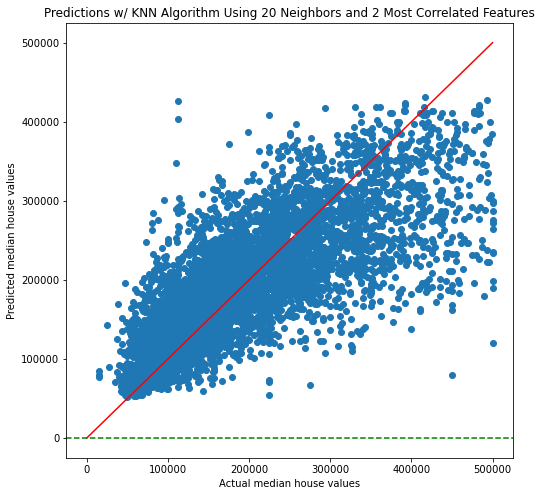

In [285]:
# Plot predictions for KNN algorithm.

plot_results(y_test, y_pred_knn_discorr, 'Predictions w/ KNN Algorithm Using ' + str(neighbors_num) + ' Neighbors and 2 Most Correlated Features')

In [572]:
# Take a deeper look at all of the actual vs. predicted values.

act_vs_pred(X_test_knn_discorr, y_test, y_pred_knn_discorr)

,Median_Income_adj,Distance_to_coast_adj,actual,pred,diff
0,0.105615,0.070364,104200.0,158525.0,-54325.0
1,0.293411,0.034193,171200.0,213595.0,-42395.0
2,0.280539,0.243019,97300.0,148520.0,-51220.0
3,0.240208,0.030625,102700.0,210120.0,-107420.0
4,0.134419,0.189486,116500.0,108595.0,7905.0
...,...,...,...,...,...
5898,0.077326,0.356258,66000.0,58425.0,7575.0
5899,0.159498,0.018568,330800.0,170645.0,160155.0
5900,0.290572,0.122209,144400.0,231140.0,-86740.0
5901,0.266853,0.058355,200000.0,220345.0,-20345.0


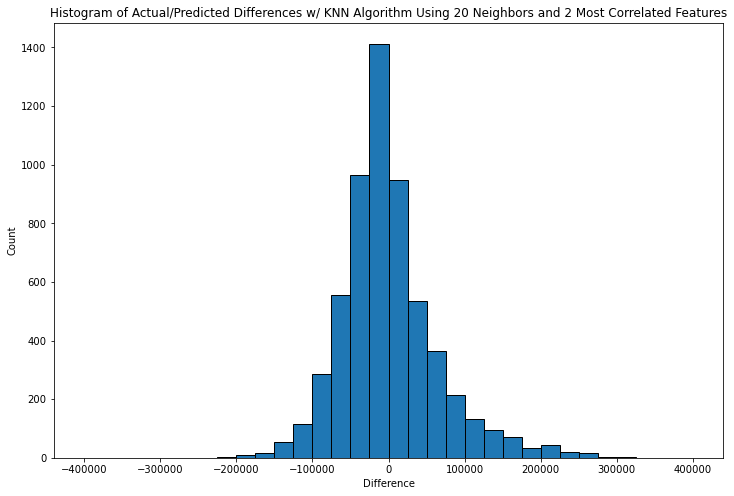

Percentage of predictions off by between -50,000 and 0: 2378.0 / 5903.0 = 0.4028
Percentage of predictions off by between 0 and 50,000:  1483.0 / 5903.0 = 0.2512
Percentage of predictions off by up to 50,000:          3861.0 / 5903.0 = 0.6541

Percentage of predictions off by between -25,000 and 0: 1413.0 / 5903.0 = 0.2394
Percentage of predictions off by between 0 and 25,000:  949.0 / 5903.0 = 0.1608
Percentage of predictions off by up to 25,000:          2362.0 / 5903.0 = 0.4001


In [589]:
act_pred_diff_hist(y_test, y_pred_knn_discorr, 'Histogram of Actual/Predicted Differences w/ KNN Algorithm Using ' + str(neighbors_num_discorr) + ' Neighbors and 2 Most Correlated Features')

In [288]:
# Calculate the RMSE of this model.

rmse(y_pred_knn_discorr, y_test)

'Average difference between predicted and actual median house values: 64667.351808785315'

__Takeaways of 5th model__:

 - From eyeballing the predictions dot plot:
    - The spread of predicted median house values as the actual values increase has increased compared to the best linear regression model.
    - There are no negative predictions.
    - The model still appears to underpredict more and more as the actual value increases, and with more and more difference, to a similar extent as the best linear regression model.
    - Visually, like the best linear regression model, predicted values tend to curve downward as actual values increase, and to a similar extent.
 - From eyeballing the differences histogram:
    - The percentage of predictions within 50,000 of the actual value are similar to those of the baseline model, as is the skewness. However, the percentage of predictions within 25,000 has increased to 40%, suggesting that predictions with any accuracy are now tending to be more accurate. 
 - The RMSE is 64,667, which is close to the lowest RMSE of any of the linear regression models.
 - Overall, this KNN regression model is comparable to the best fit linear regression model.

__6th model__: Create a KNN regression algorithm with X neighbors as determined via GridSearchCV, and using the best 10 features as determined in the 4th model via SelectKBest.

In [214]:
# Declare features to use in both training and test sets.

X_train_knn_selectKbest = X_train[cols_selected]
X_test_knn_selectKbest = X_test[cols_selected]
X_train_knn_selectKbest

,Median_Income_adj,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj
0,0.347800,0.067704,0.080087,0.041061,0.085362,0.189160,0.100989,0.035275,0.179909,0.544218
1,0.178861,0.036396,0.045941,0.023011,0.049342,0.545165,0.192332,0.463096,0.543656,0.105429
2,0.248446,0.026858,0.035698,0.024889,0.039638,0.255048,0.057921,0.220646,0.326984,0.353548
3,0.193472,0.059515,0.092038,0.042462,0.089309,0.069075,0.033856,0.129510,0.044348,0.745395
4,0.116755,0.039676,0.100264,0.055243,0.097862,0.164718,0.064046,0.005471,0.154460,0.580246
...,...,...,...,...,...,...,...,...,...,...
13767,0.094443,0.023323,0.030576,0.001850,0.006743,0.812965,0.715457,0.714069,0.753279,0.388152
13768,0.186143,0.020652,0.033214,0.009081,0.029441,0.639745,0.162816,0.568415,0.632985,0.167825
13769,0.081991,0.043975,0.074965,0.059194,0.078289,0.130712,0.003762,0.030516,0.130100,0.614388
13770,0.242849,0.029198,0.047959,0.018078,0.039967,0.526036,0.037039,0.497296,0.572441,0.020247


In [291]:
# Determine the optimal number of neighbors to use in the algorithm, first by determining the approximate neighborhood of the optimal number of neighbors, then by searching around that neighborhood.

param_grid_neighborhood_selectKbest = {'n_neighbors': np.arange(1, 21, 2)}
knn_neighborhood_selectKbest = KNeighborsRegressor()
knn_neighborhood_cv_selectKbest = GridSearchCV(knn_neighborhood_selectKbest, param_grid_neighborhood_selectKbest, cv = 5)
knn_neighborhood_cv_selectKbest.fit(X_train_knn_selectKbest, y_train)

print('Best score of neighborhoods: ' + str(knn_neighborhood_cv_selectKbest.best_score_)) # This best score pulls from 'mean_test_score' in the '.cv_results_' attribute.
print('Best neighborhood of number of parameters: ' + str(knn_neighborhood_cv_selectKbest.best_params_))

Best score of neighborhoods: 0.7036960306307302
Best neighborhood of number of parameters: {'n_neighbors': 9}


In [292]:
neighborhood_num_selectKbest = list(knn_neighborhood_cv_selectKbest.best_params_.values())[0]

param_grid_final_selectKbest = {'n_neighbors': np.arange(neighborhood_num_selectKbest - 1, neighborhood_num_selectKbest + 2)}
knn_final_selectKbest = KNeighborsRegressor()
knn_final_cv_selectKbest = GridSearchCV(knn_final_selectKbest, param_grid_final_selectKbest)
knn_final_cv_selectKbest.fit(X_train, y_train)

print('Best final score: ' + str(knn_final_cv_selectKbest.best_score_))
print('Best final number of parameters: ' + str(knn_final_cv_selectKbest.best_params_))

Best final score: 0.6888111919192328
Best final number of parameters: {'n_neighbors': 9}


In [293]:
# Build the algorithm.

neighbors_num_selectKbest = list(knn_final_cv_selectKbest.best_params_.values())[0]

knn_selectKbest = KNeighborsRegressor(neighbors_num_selectKbest)
knn_selectKbest.fit(X_train_knn_selectKbest, y_train)

KNeighborsRegressor(n_neighbors=9)

In [294]:
# Use the algorithm to predict median house value among the test set.

y_pred_knn_selectKbest = knn_selectKbest.predict(X_test_knn_selectKbest)

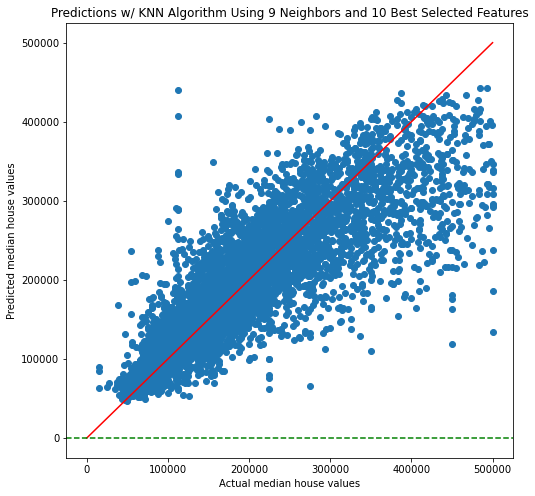

In [296]:
# Plot predictions for KNN algorithm.

plot_results(y_test, y_pred_knn_selectKbest, 'Predictions w/ KNN Algorithm Using ' + str(neighbors_num_selectKbest) + ' Neighbors and 10 Best Selected Features')

In [574]:
# Take a deeper look at all of the actual vs. predicted values.

act_vs_pred(X_test_knn_selectKbest, y_test, y_pred_knn_selectKbest)

,Median_Income_adj,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,actual,pred,diff
0,0.105615,0.063355,0.107248,0.039715,0.105428,0.027630,0.070364,0.179616,0.017150,0.806540,104200.0,130611.111111,-26411.111111
1,0.293411,0.049443,0.071551,0.033689,0.063816,0.041445,0.034193,0.158144,0.019571,0.780346,171200.0,184444.444444,-13244.444444
2,0.280539,0.042754,0.040975,0.018022,0.041776,0.170032,0.243019,0.086393,0.132346,0.652938,97300.0,114600.000000,-17300.000000
3,0.240208,0.038430,0.049201,0.026346,0.049178,0.895855,0.030625,0.905085,0.919750,0.529610,102700.0,93233.333333,9466.666667
4,0.134419,0.059769,0.094366,0.031503,0.097039,0.646121,0.189486,0.569744,0.633900,0.178410,116500.0,110566.666667,5933.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5898,0.077326,0.015031,0.020798,0.010118,0.019572,0.300744,0.356258,0.159156,0.284411,0.403818,66000.0,52522.222222,13477.777778
5899,0.159498,0.044153,0.065187,0.020825,0.058059,0.470776,0.018568,0.457389,0.537213,0.048173,330800.0,229344.444444,101455.555556
5900,0.290572,0.122361,0.131460,0.065305,0.138322,0.622742,0.122209,0.548161,0.615754,0.151543,144400.0,181677.777778,-37277.777778
5901,0.266853,0.001272,0.001707,0.001570,0.001809,0.061637,0.058355,0.144563,0.037381,0.763410,200000.0,170677.777778,29322.222222


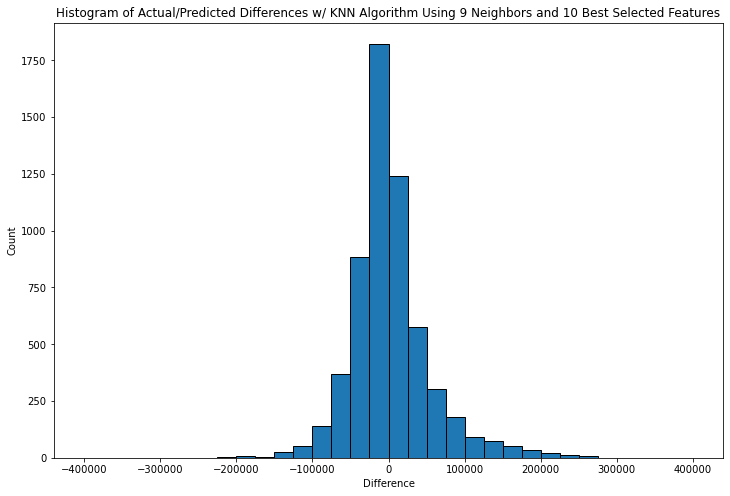

Percentage of predictions off by between -50,000 and 0: 2707.0 / 5903.0 = 0.4586
Percentage of predictions off by between 0 and 50,000:  1817.0 / 5903.0 = 0.3078
Percentage of predictions off by up to 50,000:          4524.0 / 5903.0 = 0.7664

Percentage of predictions off by between -25,000 and 0: 1824.0 / 5903.0 = 0.309
Percentage of predictions off by between 0 and 25,000:  1239.0 / 5903.0 = 0.2099
Percentage of predictions off by up to 25,000:          3063.0 / 5903.0 = 0.5189


In [590]:
act_pred_diff_hist(y_test, y_pred_knn_selectKbest, 'Histogram of Actual/Predicted Differences w/ KNN Algorithm Using ' + str(neighbors_num_selectKbest) + ' Neighbors and 10 Best Selected Features')

In [304]:
# Calculate the RMSE of this model.

rmse(y_pred_knn_selectKbest, y_test)

'Average difference between predicted and actual median house values: 53034.100450356615'

__Takeaways of 6th model__:

 - From eyeballing the predictions dot plot: 
    - The spread of predicted median house values as the actual values increase has decreased compared to the previous KNN regression model.
    - There are no negative predictions.
    - The model still appears to underpredict more and more as the actual value increases, and with more and more difference, to a similar extent as the best linear regression model.
    - Visually, like the best linear regression model, predicted values tend to curve downward as actual values increase, and to a similar extent.
 - From eyeballing the differences histogram:
    - 77% of predictions are within 50,000 of the actual value, and 52% are within 25,000. Therefore, more predictions will be closely accurate than not, and a large majority will at least be somewhat accurate. This is a large improvement over every previous model.
    - Skewness remains similar to that of the baseline model.
 - The RMSE is 53,034, which is easily the best out of any model, almost 10,000 less than that of the best linear regression model.
 - Overall, this model seems to perform better than any of the linear regression models.

__7th model__: Create a decision tree with a depth of X as determined via cross-validation scoring, and using all features.

In [613]:
# Determine the optimal depth to use in the tree, first by determining the approximate neighborhood of the optimal depth, then by searching around that neighborhood.

kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
depths_neighborhood = np.arange(3, 22, 3)
cv_scores_mean_neighborhood = []
cv_scores_std_neighborhood = []

for depth in depths_neighborhood:
    dectree = DecisionTreeRegressor(criterion = 'squared_error', max_depth = depth, random_state = 42)
    cv_scores = []

#   cv_scores = cross_val_score(dectree, X_train, y_train, cv = 5, scoring = 'accuracy') # Accuracy scoring is only for classification problems, not regression.
    for train_index, test_index in kfold.split(X_train):
        X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
        dectree_results = dectree.fit(X_train_cv, y_train_cv)
        dectree_score = dectree_results.score(X_test_cv, y_test_cv)
        cv_scores.append(dectree_score)

    cv_scores_mean_neighborhood.append(np.mean(cv_scores))
    cv_scores_std_neighborhood.append(np.std(cv_scores))

print('Depths: ' + str(depths_neighborhood))
print('Means: ' + str(cv_scores_mean_neighborhood))
print('St Devs: ' + str(cv_scores_std_neighborhood))

Depths: [ 3  6  9 12 15 18 21]
Means: [0.5142288801601267, 0.6299963471631409, 0.6860438077583777, 0.6653806369509319, 0.633130821383576, 0.6155822701080014, 0.6039830296980524]
St Devs: [0.018481026183039744, 0.011393001799138852, 0.009339576976636147, 0.010535869073984832, 0.012097011147210054, 0.017884596558632945, 0.012352799981452379]


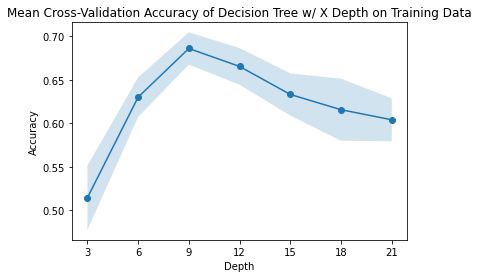

In [614]:
plt.plot(depths_neighborhood, cv_scores_mean_neighborhood, marker = 'o')
plt.fill_between(depths_neighborhood, np.array(cv_scores_mean_neighborhood) - 2 * np.array(cv_scores_std_neighborhood), np.array(cv_scores_mean_neighborhood) + 2 * np.array(cv_scores_std_neighborhood), alpha = .2)
plt.title('Mean Cross-Validation Accuracy of Decision Tree w/ X Depth on Training Data')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.xticks(depths_neighborhood)
plt.show()

In [615]:
neighborhood_num_dectree = list(depths_neighborhood)[cv_scores_mean_neighborhood.index(max(cv_scores_mean_neighborhood))]

depths_final = np.arange(neighborhood_num_dectree - 2, neighborhood_num_dectree + 3, 1)
cv_scores_mean_final = []
cv_scores_std_final = []

for depth in depths_final:
    dectree = DecisionTreeRegressor(criterion = 'squared_error', max_depth = depth, random_state = 42)
    cv_scores = []

    for train_index, test_index in kfold.split(X_train):
        X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
        dectree_results = dectree.fit(X_train_cv, y_train_cv)
        dectree_score = dectree_results.score(X_test_cv, y_test_cv)
        cv_scores.append(dectree_score)

    cv_scores_mean_final.append(np.mean(cv_scores))
    cv_scores_std_final.append(np.std(cv_scores))

print('Depths: ' + str(depths_final))
print('Means: ' + str(cv_scores_mean_final))
print('St Devs: ' + str(cv_scores_std_final))

Depths: [ 7  8  9 10 11]
Means: [0.6578539248584643, 0.6792128456756377, 0.6860438077583777, 0.6895446217127141, 0.6794020434071826]
St Devs: [0.008352291266467629, 0.009037603543361236, 0.009339576976636147, 0.004339307455235608, 0.010731893973827046]


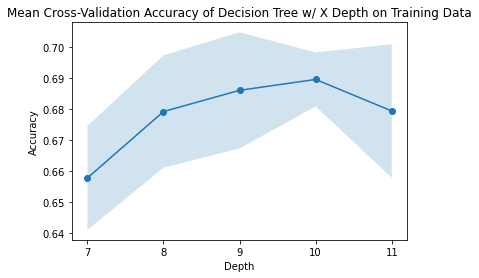

In [616]:
plt.plot(depths_final, cv_scores_mean_final, marker = 'o')
plt.fill_between(depths_final, np.array(cv_scores_mean_final) - 2 * np.array(cv_scores_std_final), np.array(cv_scores_mean_final) + 2 * np.array(cv_scores_std_final), alpha = .2)
plt.title('Mean Cross-Validation Accuracy of Decision Tree w/ X Depth on Training Data')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.xticks(depths_final)
plt.show()

In [617]:
best_depth = list(depths_final)[cv_scores_mean_final.index(max(cv_scores_mean_final))]
best_accuracy = max(cv_scores_mean_final)

print('Best depth: ' + str(best_depth) 
+ ' with an accuracy of ' + str(round(best_accuracy, 4)))

Best depth: 10 with an accuracy of 0.6895


In [425]:
# Build the algorithm.

dectree = DecisionTreeRegressor(criterion = 'squared_error', max_depth = best_depth, random_state = 42)
dectree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [426]:
# Use the algorithm to predict median house value among the test set.

y_pred_dectree = dectree.predict(X_test)

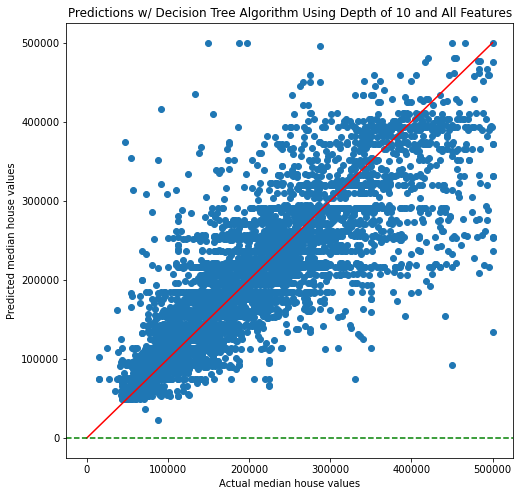

In [427]:
# Plot predictions for decision tree algorithm.

plot_results(y_test, y_pred_dectree, 'Predictions w/ Decision Tree Algorithm Using Depth of ' + str(best_depth) + ' and All Features')

In [576]:
# Take a deeper look at all of the actual vs. predicted values.

act_vs_pred(X_test, y_test, y_pred_dectree)

,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj,actual,pred,diff
0,0.105615,0.460000,0.063355,0.107248,0.039715,0.105428,0.027630,0.736056,0.070364,0.179616,0.017150,0.806540,0.822170,104200.0,133402.631579,-29202.631579
1,0.293411,0.260000,0.049443,0.071551,0.033689,0.063816,0.041445,0.718127,0.034193,0.158144,0.019571,0.780346,0.797919,171200.0,172386.075949,-1186.075949
2,0.280539,0.519677,0.042754,0.040975,0.018022,0.041776,0.170032,0.703187,0.243019,0.086393,0.132346,0.652938,0.679496,97300.0,108465.714286,-11165.714286
3,0.240208,0.400000,0.038430,0.049201,0.026346,0.049178,0.895855,0.033865,0.030625,0.905085,0.919750,0.529610,0.420662,102700.0,107656.000000,-4956.000000
4,0.134419,0.660000,0.059769,0.094366,0.031503,0.097039,0.646121,0.295817,0.189486,0.569744,0.633900,0.178410,0.145079,116500.0,92975.378788,23524.621212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5898,0.077326,0.860000,0.015031,0.020798,0.010118,0.019572,0.300744,0.531873,0.356258,0.159156,0.284411,0.403818,0.448923,66000.0,53910.666667,12089.333333
5899,0.159498,0.600000,0.044153,0.065187,0.020825,0.058059,0.470776,0.240040,0.018568,0.457389,0.537213,0.048173,0.109531,330800.0,196275.000000,134525.000000
5900,0.290572,0.340000,0.122361,0.131460,0.065305,0.138322,0.622742,0.297809,0.122209,0.548161,0.615754,0.151543,0.128793,144400.0,221682.129278,-77282.129278
5901,0.266853,0.900000,0.001272,0.001707,0.001570,0.001809,0.061637,0.721116,0.058355,0.144563,0.037381,0.763410,0.782238,200000.0,184392.803970,15607.196030


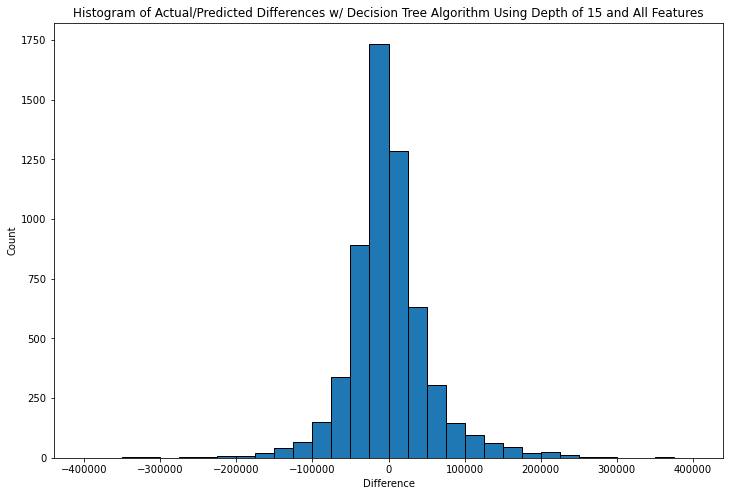

Percentage of predictions off by between -50,000 and 0: 2626.0 / 5903.0 = 0.4449
Percentage of predictions off by between 0 and 50,000:  1914.0 / 5903.0 = 0.3242
Percentage of predictions off by up to 50,000:          4540.0 / 5903.0 = 0.7691

Percentage of predictions off by between -25,000 and 0: 1735.0 / 5903.0 = 0.2939
Percentage of predictions off by between 0 and 25,000:  1284.0 / 5903.0 = 0.2175
Percentage of predictions off by up to 25,000:          3019.0 / 5903.0 = 0.5114


In [593]:
act_pred_diff_hist(y_test, y_pred_dectree, 'Histogram of Actual/Predicted Differences w/ Decision Tree Algorithm Using Depth of ' + str(best_depth) + ' and All Features')

In [429]:
len(comparisons_dectree['pred'].unique())

472

In [430]:
comparisons_dectree['pred'].value_counts().head(25)

184392.803970    348
216292.649098    310
160884.105960    147
109050.666667    129
92975.378788     120
221682.129278    115
290700.921659    109
205920.000000    100
141694.594595     95
142363.157895     87
112310.285714     80
290589.375000     75
236291.099476     73
124748.333333     73
183058.235294     71
255705.641026     70
74779.428571      70
319684.353741     69
114019.753086     68
175253.658537     67
81641.726619      66
154653.191489     66
261400.934579     54
163426.495726     51
133717.525773     49
Name: pred, dtype: int64

In [434]:
# Calculate the RMSE of this model.

rmse(y_pred_dectree, y_test)

'Average difference between predicted and actual median house values: 54861.143865538834'

__Takeaways of 7th model__:

 - From eyeballing the predictions dot plot: 
    - The spread of predicted median house values as the actual values increase appears to be similar to that of the previous model.
    - There are no negative predictions.
    - The model still appears to underpredict more and more as the actual value increases, and with more and more difference, although to a lesser extent than any other model, including the linear regression models.
    - Visually, predicted values tend to curve downward as actual values increase, although again to a lesser extent than any other model.
 - From eyeballing the differences histogram:
    - The percentage of predictions within 50,000 of the actual value are similar to those of the previous model, as is the skewness. This is therefore also a very accurate model.
 - The RMSE is 54,861, which is very close to the best RMSE that the previous model had.
 - There are only 472 unique values. Presumably this is because decision tree regression use the average price of the training-set records at the end of each branch as the prediction for testing-set records that go through the same branches.
 - Overall, this model seems to perform as well as the best KNN regression model, and still better than any linear regression model.

__8th model__: Create a random forest algorithm using all features.

In [618]:
# Determine the optimal depth to use in the forest, first by determining the approximate neighborhood of the optimal depth, then by searching around that neighborhood.

kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
depths_neighborhood = np.arange(3, 22, 3)
cv_scores_mean_neighborhood = []
cv_scores_std_neighborhood = []

for depth in depths_neighborhood:
    randfor = RandomForestRegressor(n_estimators = 100, criterion = 'squared_error', max_depth = depth, random_state = 42)
    cv_scores = []

    for train_index, test_index in kfold.split(X_train):
        X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
        randfor_results = randfor.fit(X_train_cv, np.ravel(y_train_cv))
        randfor_score = randfor_results.score(X_test_cv, np.ravel(y_test_cv))
        cv_scores.append(randfor_score)

    cv_scores_mean_neighborhood.append(np.mean(cv_scores))
    cv_scores_std_neighborhood.append(np.std(cv_scores))

print('Depths: ' + str(depths_neighborhood))
print('Means: ' + str(cv_scores_mean_neighborhood))
print('St Devs: ' + str(cv_scores_std_neighborhood))

Depths: [ 3  6  9 12 15 18 21]
Means: [0.5320976693073792, 0.668261322773634, 0.7500587917972936, 0.7805935658274423, 0.7905692529005175, 0.7941426096009947, 0.7951199452249029]
St Devs: [0.017621073523830987, 0.01471829258594603, 0.01053907223056257, 0.00835523199272447, 0.008029873657699362, 0.006818125048408601, 0.006854241265873504]


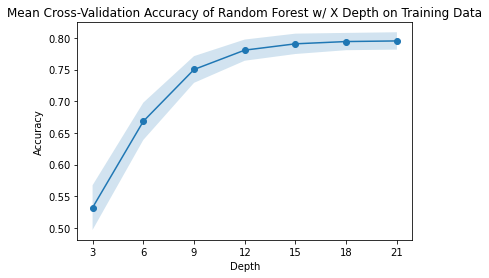

In [443]:
plt.plot(depths_neighborhood, cv_scores_mean_neighborhood, marker = 'o')
plt.fill_between(depths_neighborhood, np.array(cv_scores_mean_neighborhood) - 2 * np.array(cv_scores_std_neighborhood), np.array(cv_scores_mean_neighborhood) + 2 * np.array(cv_scores_std_neighborhood), alpha = .2)
plt.title('Mean Cross-Validation Accuracy of Random Forest w/ X Depth on Training Data')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.xticks(depths_neighborhood)
plt.show()

In [453]:
list(depths_neighborhood).index(15)

4

In [457]:
# After a depth of 15, which has a mean accuracy of 0.7906, mean accuracy doesn't increase by more than 0.001 per 3 increases in depth. We will therefore use this depth for the final model.

best_depth = 15
best_accuracy = cv_scores_mean_neighborhood[list(depths_neighborhood).index(15)]

print('Best depth: ' + str(best_depth) 
+ ' with an accuracy of ' + str(round(best_accuracy, 4)))

Best depth: 15 with an accuracy of 0.7906


In [458]:
# Build the algorithm.

randfor = RandomForestRegressor(n_estimators = 100, criterion = 'squared_error', max_depth = best_depth, random_state = 42)
randfor.fit(X_train, np.ravel(y_train))

RandomForestRegressor(max_depth=15, random_state=42)

In [459]:
# Use the algorithm to predict median house value among the test set.

y_pred_randfor = randfor.predict(X_test)

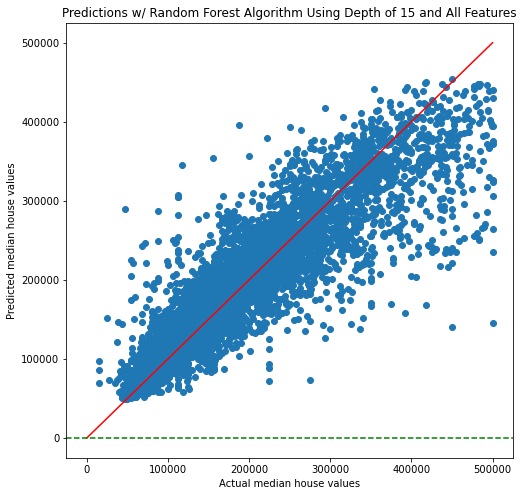

In [460]:
# Plot predictions for decision tree algorithm.

plot_results(y_test, y_pred_randfor, 'Predictions w/ Random Forest Algorithm Using Depth of ' + str(best_depth) + ' and All Features')

In [578]:
# Take a deeper look at all of the actual vs. predicted values.

act_vs_pred(X_test, y_test, y_pred_randfor)

,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj,actual,pred,diff
0,0.105615,0.460000,0.063355,0.107248,0.039715,0.105428,0.027630,0.736056,0.070364,0.179616,0.017150,0.806540,0.822170,104200.0,122196.943145,-17996.943145
1,0.293411,0.260000,0.049443,0.071551,0.033689,0.063816,0.041445,0.718127,0.034193,0.158144,0.019571,0.780346,0.797919,171200.0,170944.393150,255.606850
2,0.280539,0.519677,0.042754,0.040975,0.018022,0.041776,0.170032,0.703187,0.243019,0.086393,0.132346,0.652938,0.679496,97300.0,115739.391057,-18439.391057
3,0.240208,0.400000,0.038430,0.049201,0.026346,0.049178,0.895855,0.033865,0.030625,0.905085,0.919750,0.529610,0.420662,102700.0,119909.425111,-17209.425111
4,0.134419,0.660000,0.059769,0.094366,0.031503,0.097039,0.646121,0.295817,0.189486,0.569744,0.633900,0.178410,0.145079,116500.0,105948.925681,10551.074319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5898,0.077326,0.860000,0.015031,0.020798,0.010118,0.019572,0.300744,0.531873,0.356258,0.159156,0.284411,0.403818,0.448923,66000.0,57960.182737,8039.817263
5899,0.159498,0.600000,0.044153,0.065187,0.020825,0.058059,0.470776,0.240040,0.018568,0.457389,0.537213,0.048173,0.109531,330800.0,212920.187916,117879.812084
5900,0.290572,0.340000,0.122361,0.131460,0.065305,0.138322,0.622742,0.297809,0.122209,0.548161,0.615754,0.151543,0.128793,144400.0,164855.367605,-20455.367605
5901,0.266853,0.900000,0.001272,0.001707,0.001570,0.001809,0.061637,0.721116,0.058355,0.144563,0.037381,0.763410,0.782238,200000.0,213604.073118,-13604.073118


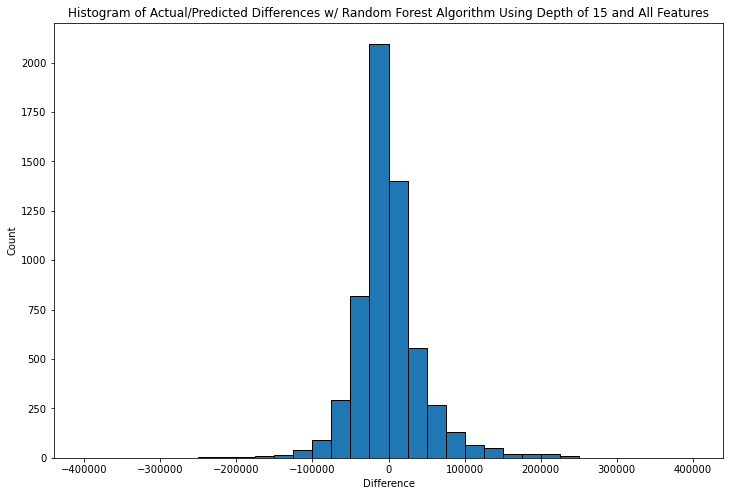

Percentage of predictions off by between -50,000 and 0: 2913.0 / 5903.0 = 0.4935
Percentage of predictions off by between 0 and 50,000:  1957.0 / 5903.0 = 0.3315
Percentage of predictions off by up to 50,000:          4870.0 / 5903.0 = 0.825

Percentage of predictions off by between -25,000 and 0: 2096.0 / 5903.0 = 0.3551
Percentage of predictions off by between 0 and 25,000:  1401.0 / 5903.0 = 0.2373
Percentage of predictions off by up to 25,000:          3497.0 / 5903.0 = 0.5924


In [592]:
act_pred_diff_hist(y_test, y_pred_randfor, 'Histogram of Actual/Predicted Differences w/ Random Forest Algorithm Using Depth of ' + str(best_depth) + ' and All Features')

In [462]:
# Calculate the RMSE of this model.

rmse(y_pred_randfor, y_test)

'Average difference between predicted and actual median house values: 44828.16086137923'

__Takeaways of 8th model__:

 - From eyeballing the predictions dot plot:
    - The spread of predicted median house values as the actual values increase only slowly increases, much better than any other model. For most of the actual values, especially the lower ones, the spread remains largely the same.
    - There are no negative predictions.
    - The model only somewhat appears to underpredict more and more as the actual value increases, again much better than any other model.
    - Visually, predicted values linearly increase with the actual values, only tending to curve downward with the highest actual values.
 - From eyeballing the differences histogram:
    - 83% of predictions are within 50,000 of the actual value, and 59% are within 25,000. Compared to the last two models, even more predictions will be closely accurate than not, and a larger majority will at least be somewhat accurate. This is likely the best model.
    - Skewness remains similar to that of the baseline model.
 - The RMSE is 44,828, which is almost 9,000 less than the model with the previously best RMSE.
 - Overall, this model visually and statistically performs better than any previous model.

__Things to consider__:

 - Apply cross-validation to all linear regression models
 - Consider regularized regression for LR models (Ridge, Lasso)
 - Consider gradient boosting

__Notes for next time__:

 - Convert X and y data from dataframes to NumPy arrays before modeling. Not doing this has required many bandaid lines of code down the road.
 - Consider using sklearn's LinearRegression instead of statsmodels' OLS. This may be causing some confusion with compatibility of certain methods and such.
 - The RMSE formula does not need to be defined, as it exists within sklearn already - use the following: <br>
   &ensp; from sklearn.metrics import mean_squared_error <br>
   &ensp; mean_squared_error(y_test, y_pred, squared = False))
 - Consider using RandomizedSearchCV instead of GridSearchCV if the combination of hyperparameters/hyperparameter options/cross-validation folds is too large.